#**Aplicação da Rede Neural para Classificação Básica de Texto**

Treinamendo de um modelo de rede neural que classifica filmes como **positivo** ou **negativo** usando o texto da avaliação.


Base de dados: [IMDb](https://https://www.imdb.com/)

A Base de Dados contém avaliações de 50.000 filmes do banco de dados **Internet Movie Database**.




###**Preparando o ambiente**

In [1]:
#Importando TensorFlow e Keras
import tensorflow as tf
from tensorflow import keras

#Importando Numpy
import numpy as np

#Versão do TensorFlow
print(tf.__version__)

2.5.0


### **Importando o Dataset**

Treino / Teste

In [2]:
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

``num_words`` = mantém 10.000 palavras **mais frequentes no conjunto de treinamento**.

As palavras mais raras são descartadas para preservar o tamanho dos dados de forma maleável.



###**Explorando os dados**

O conjunto de dados vem pré-processado: cada exemplo é um array de inteiros representando as palavras da avaliação do filme. Cada label é um inteiro com valor ou de 0 ou 1, onde 0 é uma avaliação negativa e 1 é uma avaliação positiva.

In [3]:
print("Entrada de treino: {}, labels: {}".format(len(train_data), len(train_labels)))

Entrada de treino: 25000, labels: 25000


O texto das avaliações foi **convertido para inteiros**, onde cada inteiro representa uma palavra específica no dicionário:

In [4]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


As avaliações dos filmes têm tamanhos diferentes. O código abaixo mostra o número de palavras da primeira e segunda avaliação.

Porém o número de entradas da rede neural tem que ser o mesmo também.

In [5]:
len(train_data[0]), len(train_data[1])

(218, 189)

**CONVERTENDO INTEIROS PARA PALAVRAS**

Função de ajuda para consultar um objeto dictionary que contenha inteiros mapeados em strings:


In [6]:
#Dicionário mapenado as palvras em índices inteiros
word_index = imdb.get_word_index()

#Os primeiros índices são reservados
word_index = {k:(v+3) for k, v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
  return ' ' . join([reverse_word_index.get(i, '?') for i in text])


In [7]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

### **Preparando os dados**

In [8]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding = 'post',
                                                        maxlen = 256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value = word_index["<PAD>"],
                                                       padding = 'post', 
                                                       maxlen = 256)

In [9]:
#Tamanho dos exemplos
len(train_data[0]), len(train_data[1])

(256, 256)

In [10]:
#Inspeção das primeiras avaliações
print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

### **Construção do modelo**

In [11]:
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


As camadas são empilhadas sequencialmente para construir o classificador, sendo elas:

* Embedding 
* Global Average Pooling 1D (permite retornar um vetor de saída com comprimento fico para cada exemplo, fazendo a média da sequência da dimensão).
* Vetor de Saída - Dense
* Densely Connected - um único nó de saída usando uma função de ativação **Sigmoid**.


In [12]:
model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

###Criando um conjunto de validação

In [13]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]


### **Treinando o modelo**

Treinamento do modelo em 40 epochs com mini-batches de 512 exemplos. 

In [14]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 40,
                    batch_size = 512,
                    validation_data = (x_val, y_val),
                    verbose=1)

Epoch 1/40
30/30 [==============================] - 1s 26ms/step - loss: 0.6921 - accuracy: 0.5470 - val_loss: 0.6905 - val_accuracy: 0.5871
Epoch 2/40
30/30 [==============================] - 1s 20ms/step - loss: 0.6872 - accuracy: 0.6846 - val_loss: 0.6834 - val_accuracy: 0.7414
Epoch 3/40
30/30 [==============================] - 1s 20ms/step - loss: 0.6761 - accuracy: 0.7528 - val_loss: 0.6696 - val_accuracy: 0.7532
Epoch 4/40
30/30 [==============================] - 1s 20ms/step - loss: 0.6560 - accuracy: 0.7715 - val_loss: 0.6452 - val_accuracy: 0.7679
Epoch 5/40
30/30 [==============================] - 1s 21ms/step - loss: 0.6243 - accuracy: 0.7908 - val_loss: 0.6116 - val_accuracy: 0.7682
Epoch 6/40
30/30 [==============================] - 1s 20ms/step - loss: 0.5836 - accuracy: 0.8064 - val_loss: 0.5715 - val_accuracy: 0.7980
Epoch 7/40
30/30 [==============================] - 1s 21ms/step - loss: 0.5378 - accuracy: 0.8257 - val_loss: 0.5291 - val_accuracy: 0.8077
Epoch 8/40
30

###**Avaliação do modelo**

In [15]:
results = model.evaluate(test_data, test_labels, verbose=2)
print(results)

782/782 - 1s - loss: 0.3267 - accuracy: 0.8732
[0.3267369866371155, 0.8732399940490723]


**Acurácia = 87%**

Lembrando que foi treinado com apenas 30 epochs.

In [16]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

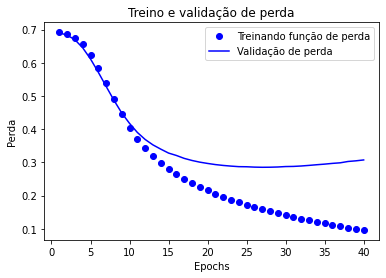

In [19]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Treinando função de perda')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validação de perda')
plt.title('Treino e validação de perda')
plt.xlabel('Epochs')
plt.ylabel('Perda')
plt.legend()

plt.show()

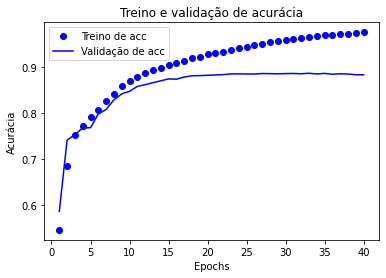

In [20]:
plt.clf()

plt.plot(epochs, acc, 'bo', label='Treino de acc')
plt.plot(epochs, val_acc, 'b', label="Validação de acc")
plt.title("Treino e validação de acurácia")
plt.xlabel('Epochs')
plt.ylabel('Acurácia')
plt.legend()

plt.show()